# Beta-Binomial model - Bayes' billiard - Estimating a probability

# _Josep Fortiana  $\hspace{4cm}$   2022-03-07_

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{Prob}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# Grid approximation (Discretizing a continuous prior pdf)

# Observed data

$n$ Bernoulli experiments, in $n_{1}$ of which a $1$ has been observed.

In [1]:
n<-50
n1<-15
x.obs<-n1

# 2. Bayesian study 

# Model description

A plain Beta-Bernoulli model as in the Bayes' billiard problem. 

Learn about an unknown probability $\theta$ from an independent sequence of $n$ Bernoulli experiments $Y_{1},\dots,Y_{n}$ iid $\sim\operatorname{Bern}(\theta)$, in $n_{1}$ of which the $1$ value was observed.

## Likelihood

$n_{1}\sim\binomdist(\text{size}=n,\text{prob}=\theta)$

## Prior distribution $\theta\sim\betadist(a,b)$

#### $\unifdist(0,1)=\betadist(1,1)$, more generally $\theta\sim\betadist(a,b)$,

In [2]:
#  a=1, b=1 is the Unif(0,1) distribution
a<-2
b<-5

## Discretize the prior

Given the prior pdf $p(\theta)$, $\theta\in(0,1)$.

Cut the support interval $(0,1)$ in $N$ intervals. 

Build a discrete r.v. with the $N$ values $1/N,\dots,N/N$ and probabilities:

$$
    \prob\big(\dfrac{i}{N}\big)=
    \prob\big\{\theta\in\big(\dfrac{i-1}{N},\dfrac{i}{N}\big)\big\},\mskip40mu 1\leq i\leq N.
$$

In [3]:
N<-1000
grid<-seq(0,1,by=1/N)
length(grid)

[1] 1001

In [4]:
theta<-grid[-1]  # remove initial 0
p.prior<-pbeta(grid,a,b)
d.prior<-diff(p.prior)
length(d.prior)
sum(d.prior)

[1] 1000

[1] 1

#### Plot of prior pdf and discretized prior pdf

When $N$ is large the discretized pmf appears visually as a continuous curve. It is not, you can try with smaller $N$.

Notice the different scale of both vertical axes.

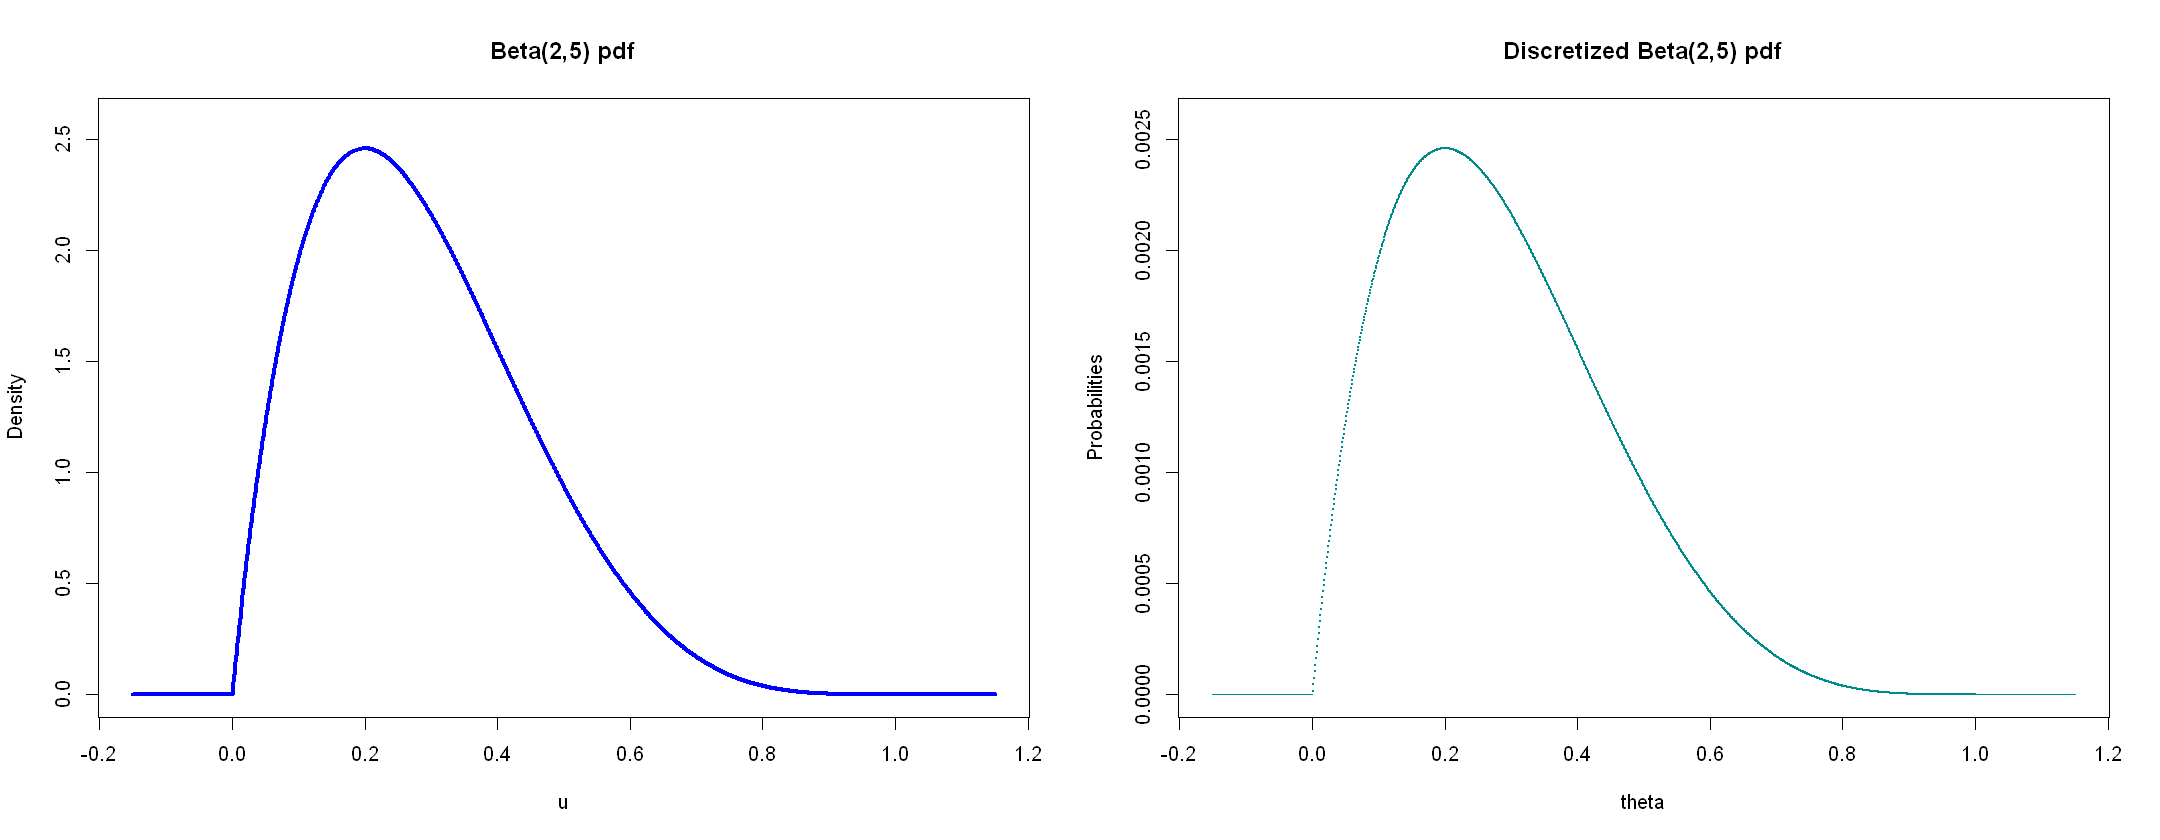

In [5]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-dbeta(u,a,b)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Beta(%d,%d) pdf",a,b))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")
plot(theta,d.prior,ylim=c(0,max(d.prior)*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,
     main=sprintf("Discretized Beta(%d,%d) pdf",a,b))
lines(c(-0.15,0),c(0,0),lwd=1,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=1,col="DarkCyan")

## Bayes' formula

The posterior pmf $p(\theta\,|\,x)$ is obtained from Bayes' formula for pmf's:

$$
    p(\theta\CondTo x)=\dfrac{p(x\,,\,\theta)}{p(x)}=
    \dfrac{p(x\CondTo\theta)\cdot p(\theta)}{p(x)}.
$$

We need only compute the numerator, the product of:

$$
    \big(\text{Likelihood at grid values}\big)\times\big(\text{Prior probabilities at grid values}\big).
$$

Then the posterior pmf is obtained by imposing that the sum of its values must be 1. 

At this stage $x=x.obs$, the observed datum.

In [6]:
Lik<-dbinom(x.obs,size=n,prob=theta)

In [7]:
Joint<-Lik*d.prior

In [8]:
Normalizing.constant<-sum(Joint)
d.post<-Joint/Normalizing.constant

From the theory, in a model with Binomial likelihood $X\sim\operatorname{Binomial}(n\CondTo\theta)$ with a Beta prior $\theta\sim\operatorname{Beta}(a,b)$, when the observed datum is $X=x_{\text{obs}}$ the posterior distribution is another Beta (this is a conjugate model),

$$
    \betadist(a+x_{\text{obs}},b+n-x_{\text{obs}}).
$$

Here we compare the probabilities of the $\theta_{\text{post}}$ sample with the theoretical pdf:

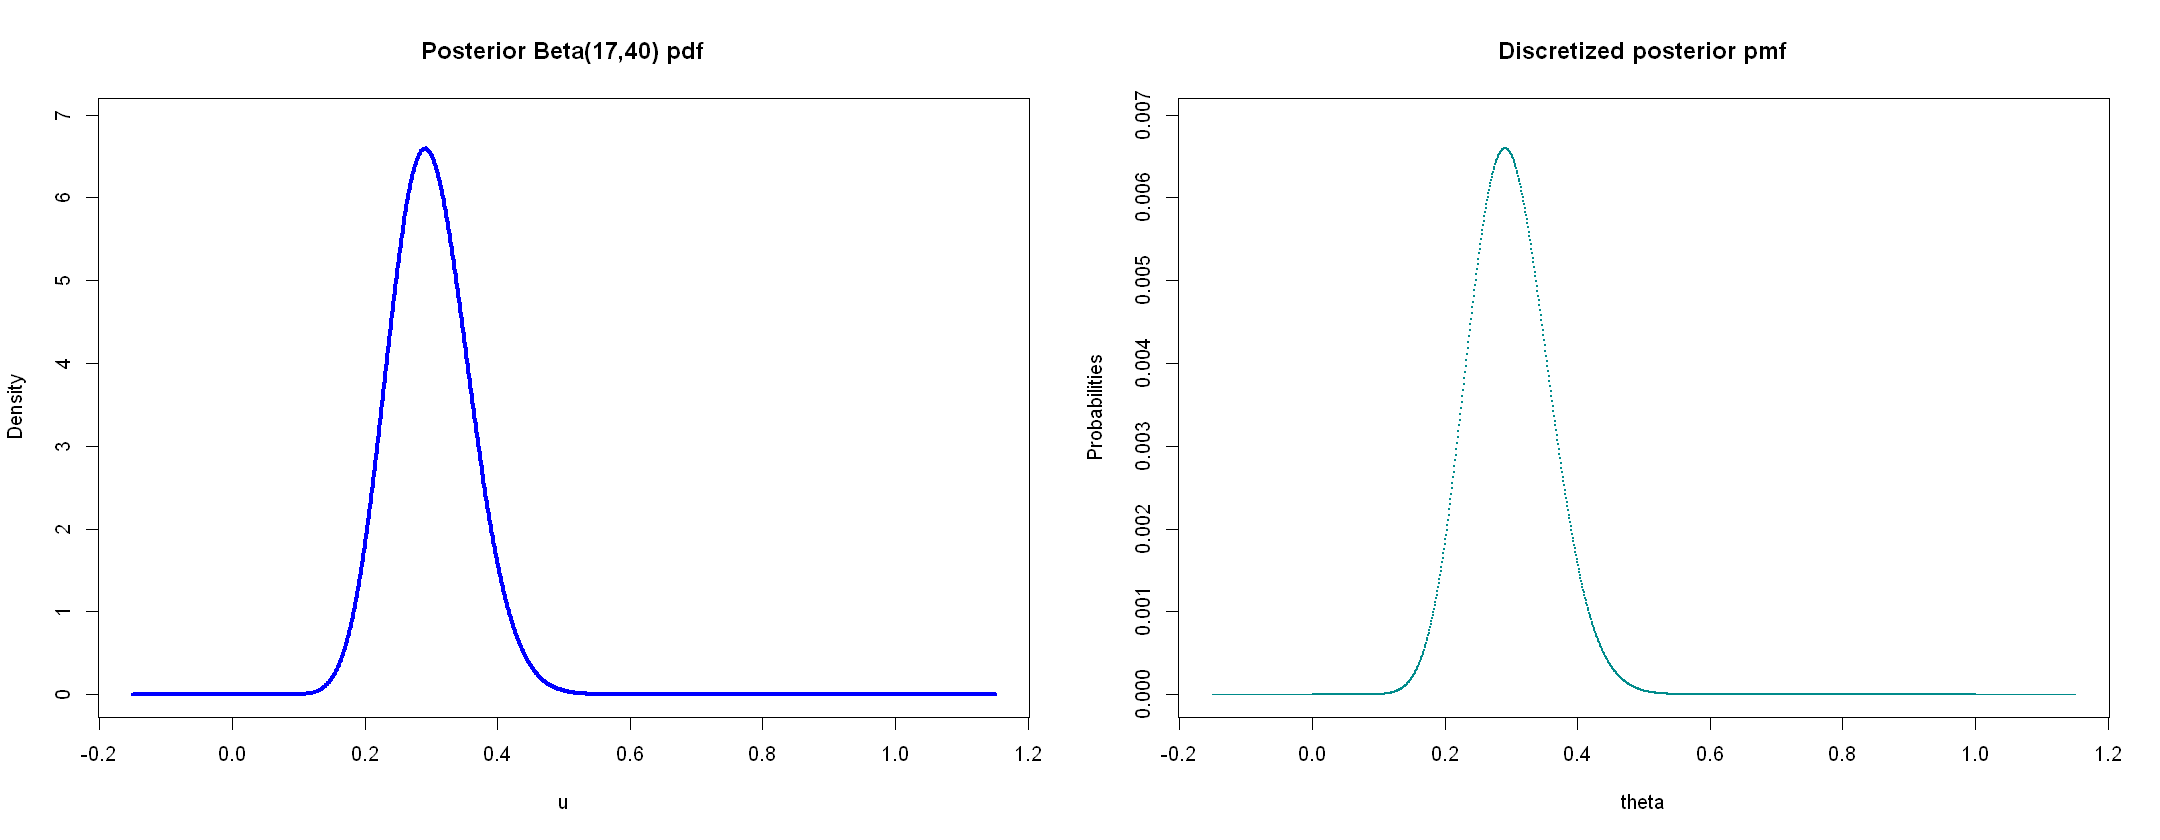

In [9]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
a1<-a+x.obs
b1<-b+n-x.obs
v<-dbeta(u,a1,b1)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Posterior Beta(%d,%d) pdf",a1,b1))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")
plot(theta,d.post,ylim=c(0,max(d.post)*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,main="Discretized posterior pmf")
lines(c(-0.15,0),c(0,0),lwd=1,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=1,col="DarkCyan")

In [10]:
set.seed(24025)

# 03. Analysis of posterior quantities

The total posterior information IS the posterior pdf

Any relevant statistical quantities we are interested in we can be extract from it:

### 01 - MAP estimator

By definition, the mode of the posterior distribution. 

For a generic $\betadist(\alpha,\beta)$, the mode is:

 
$$
\mskip-300mu
    \begin{array}{ll}
    &\dfrac{\alpha -1}{\alpha+\beta-2},\mskip20mu&\text{for}\mskip8mu\alpha, \beta > 1,\\[0.25cm]
    &\text{Any value in }(0,1),                       &\text{for}\mskip8mu  \alpha, \beta = 1\\[0.25cm]
    &\{0, 1\}\mskip8mu\text{(bimodal)},               &\text{for}\mskip8mu \alpha, \beta < 1\\[0.25cm]
    &0,                                               &\text{for}\mskip8mu \alpha\leq 1, \beta > 1\\[0.25cm]
    &1,                                               &\text{for}\mskip8mu \alpha > 1, \beta ≤ 1.
    \end{array}
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
\mskip-500mu
    \text{MAP}=\dfrac{a+x_{\text{obs}}-1}{a+x_{\text{obs}}+b+n-x_{\text{obs}}-2}
               =\dfrac{x_{\text{obs}}+a-1}{n+a+b-2}
$$

#### Note

For the uniform prior $a=1$, $b=1$, the MAP estimate of $\theta$ coincides with the frequentist ML estimate.

In [11]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Theor.MAP = %d/%d = %4.2f",a1,b1,(a1-1)/(a1+b1-2)),sep=""))

Beta(17,40), Theor.MAP = 17/40 = 0.29

For the discretized pmf:

In [12]:
# See the help for density()
Disc.MAP<-theta[which.max(d.post)]
cat(sprintf("Disc.MAP = %4.2f", round(Disc.MAP,3)))

Disc.MAP = 0.29

### 02 - Posterior expectation

By definition, the expectation of the posterior distribution. For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the expectation is:

 
$$
    \mskip-600mu
    \operatorname{E}(Z)=\dfrac{\alpha}{\alpha+\beta}.
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
    \mskip-500mu
    \operatorname{E}(Z)=\dfrac{a+x_{\text{obs}}}{a+x_{\text{obs}}+b+n-x_{\text{obs}}}
               =\dfrac{x_{\text{obs}}+a}{n+a+b}
$$

In [13]:
cat(paste(sprintf("Beta(%d,%d),",a1,b1)," ",
          sprintf("Theor.Post.Expectation = %d/%d = %4.2f.",a1,b1,(a1)/(a1+b1)),sep=""))

Beta(17,40), Theor.Post.Expectation = 17/40 = 0.30.

For the simulated $\theta_{\text{post}}$ sample:

In [14]:
Disc.Post.Expectation<-sum(theta*d.post)

In [15]:
cat(paste(sprintf("Beta(%d,%d),",a1,b1)," ",
          sprintf("Disc.Post.Expectation = %4.2f.",round(Disc.Post.Expectation,3)),sep=""))

Beta(17,40), Disc.Post.Expectation = 0.30.

### 03 - Posterior variance

By definition, the variance of the posterior distribution. For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the variance is:

 
$$
    \mskip-600mu
    \operatorname{var}(Z)=
    \dfrac{\alpha\,\beta}{(\alpha+\beta)^2\,(\alpha+\beta+1)}.
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
    \mskip-500mu
    \operatorname{var}(Z)=\dfrac{(a+x_{\text{obs}})\,(b+n-x_{\text{obs}})}
    {(a+b+n)^{2}\,(a+b+n+1)}.
$$

Observe that for a large sample size $n$ in the original experiment, assuming that both $x_{\text{obs}}$ and $n-x_{\text{obs}}$ grow following $n$, then the posterior variance diminishes as $1/n$.

In [16]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Theor.Post.Variance = %d/%d = %7.4f",(x.obs+a)*(b+n-x.obs),(n+a+b)^2*(a+b+n+1),
                round((x.obs+a)*(b+n-x.obs)/((n+a+b)^2*(a+b+n+1)),4)),sep=""))

Beta(17,40), Theor.Post.Variance = 680/188442 =  0.0036

In [17]:
Disc.Post.Variance<-sum((theta-Disc.Post.Expectation)^2*d.post)

In [18]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Disc.Post.Variance = %7.4f",round(Disc.Post.Variance,4)),sep=""))

Beta(17,40), Disc.Post.Variance =  0.0036

### 04 - Posterior quartiles and, in general, quantiles

The median (second quartile) is the only quartile with a usable analytical approximation. 

For a generic $Z\sim\betadist(\alpha,\beta)$, the median can be approximated by the expression:

$$
    \text{Median}(Z)\approx \dfrac{\alpha-\tfrac{1}{3}}{\alpha+\beta-\tfrac{2}{3}},\mskip18mu\text{for}
    \mskip8mu\alpha,\,\beta>1.
$$

For comparison we compute from the quantile function for the theoretical posterior pdf

In [19]:
round(qbeta(c(0,0.25,0.50,0.75,1),a1,b1),4)

[1] 0.0000 0.2561 0.2959 0.3378 1.0000

For the discretized posterior we obtain the cumulative distribution functions and, from it, any quantile we need:

In [20]:
p.post<-c(0,cumsum(d.post))   # append a 0 at the beginning 
p.post[N+1]<-1                # force p.post[N+1]=1 as it should be, avoiding the rounding error when compared to 1.
theta0<-c(0,theta)

#### A quantile function for the posterior distribution

In [21]:
q.post<-function(t){theta0[min(which(p.post>=t))]}

In [22]:
Vq.post<-Vectorize(q.post)
Disc.Post.Quartiles<-Vq.post(c(0,0.25,0.50,0.75,1))
round(Disc.Post.Quartiles,4)

[1] 0.000 0.256 0.296 0.338 1.000

### 05 - Credible intervals

The Bayesian concept of _credible interval_ has not the intrinsic "conceptual instability" of frequentist _confidence intervals (C.I.)._ In a frequentist context almost everyone indulges in thinking of _the probability_ that the parameter belongs to a given C.I., meaningless within this conceptual framework where a parameter $\theta$ is a non random quantity, and a C.I. for $\theta$ with confidence coefficient $\gamma\in(0,1)$ (usually $\gamma=0.90$ or $\gamma=0.95$) is a pair of r.v. $A(X)$, $B(X)$, functions of the random sample $X$, such that:

$$
    \operatorname{Prob}\big(A(X)\leq \theta \leq B(X)\big) \geq \gamma.
$$

When we evaluate $X$ as the actually observed sample $x$, we get the two numbers $a=A(x)$ and $b=B(x)$. We tend to believe that with probability $\geq\gamma$ the $[a,b]\subset\mathbb{R}$ interval contains $\theta$, which is a FALSEHOOD. 

After a calm reflection, we must agree that either $\gamma\in[a,b]$ or $\gamma\notin[a,b]$. We do not know and will never know which one is true. Remember, in the frequentist framework $\theta$ is a constant, therefore an expression such as:

$$
    \tag{$\star$}
    \operatorname{Prob}\big(a\leq \theta \leq b\big)\geq\gamma
$$

is MEANINGLESS: nothing random there. The frequentist interpretation is, of course, that a large number $n$ of
independent realizations of the experiment should give intervals $(a_{j},b_{j})$, $1\leq j\leq n$, and we expect that a proportion $\geq\gamma$ of them will contain $\theta$ (but, again, this cannot be ascertained).

In the Bayesian framework parameters are random, thus a _credible interval_ (more generally, a _credible region)_ is a sound concept. 

Statement $(\star)$ has a well-defined meaning in Bayesian statistics.

For the billiard problem any interval $(a,b)\subset[0,1]$ satisfying $(\star)$ could be a Credible Interval. 

#### (1)  A reasonable credible interval is the one centered on the MAP estimate, an interval of the form:

$$
    (\mbox{MAP}-t,\mbox{MAP}+t),
$$

where the half-width $t$ is determined by the condition that the posterior probability in the interval is $\geq\gamma$.

#### It will be useful to have the posterior cdf as a function of theta

In [23]:
p.post.fun<-function(x){return(p.post[min(which(theta0>=x))])}
Vp.post.fun<-Vectorize(p.post.fun)

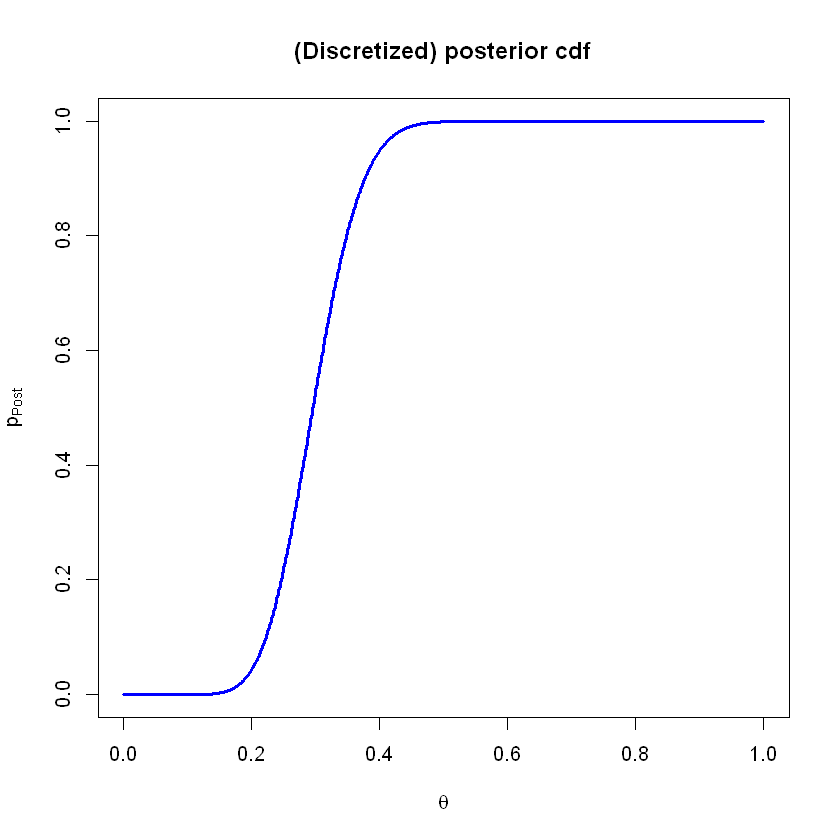

In [24]:
options(repr.plot.width=7,repr.plot.height=7)
plot(theta0,Vp.post.fun(theta0),type="l",lwd=3,col="blue",
        xlab=expression(theta), ylab=expression(p[Post]),main="(Discretized) posterior cdf")

In [25]:
gamma<-0.90
Disc.gamma<-function(t){Vp.post.fun(Disc.MAP+t)-Vp.post.fun(Disc.MAP-t)-gamma} # Prob in (MAP-t,MAP+t) minus gamma
G.t<-uniroot(Disc.gamma,c(0,0.5))
Disc.t<-G.t$root
round(Disc.t,4)

[1] 0.099

We should see to it that the interval does not overstep the support boundaries, which is, in principle, possible with this construction.

In [26]:
Credible.Interval.01<-c(max(0,Disc.MAP-Disc.t),min(1,Disc.MAP+Disc.t))
cat(sprintf("Credible interval 01 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.01[1],4),round(Credible.Interval.01[2],4)))

Credible interval 01 (90.00 %): (0.1920, 0.3900)

In [27]:
width.01<-diff(Credible.Interval.01)
round(width.01,4)

[1] 0.198

#### (2) An easier determination is the interval symmetrically placed in probabilities, leaving out a probability $(1-\gamma)/2$ on both sides.

In [28]:
gamma<-0.90
delta<-(1-gamma)/2
Credible.Interval.02<-Vq.post(c(delta,1-delta))
cat(sprintf("Credible interval 02 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.02[1],4),round(Credible.Interval.02[2],4)))

Credible interval 02 (90.00 %): (0.2040, 0.4010)

In [29]:
width.02<-diff(Credible.Interval.02)
round(width.02,4)

[1] 0.197

In principle solution (1) would seem better, giving a narrower interval, as it is centered around the peak of the probability density. However we see that, in fact, it is the other way around, solution (2) gives a narrower interval. The reason is that
to find an optimal, minimizing width, interval we should take into account the asymmetry of the pdf.

#### (3) Another possibility is the interval determined by intersecting the discretized posterior pdf with a horizontal line

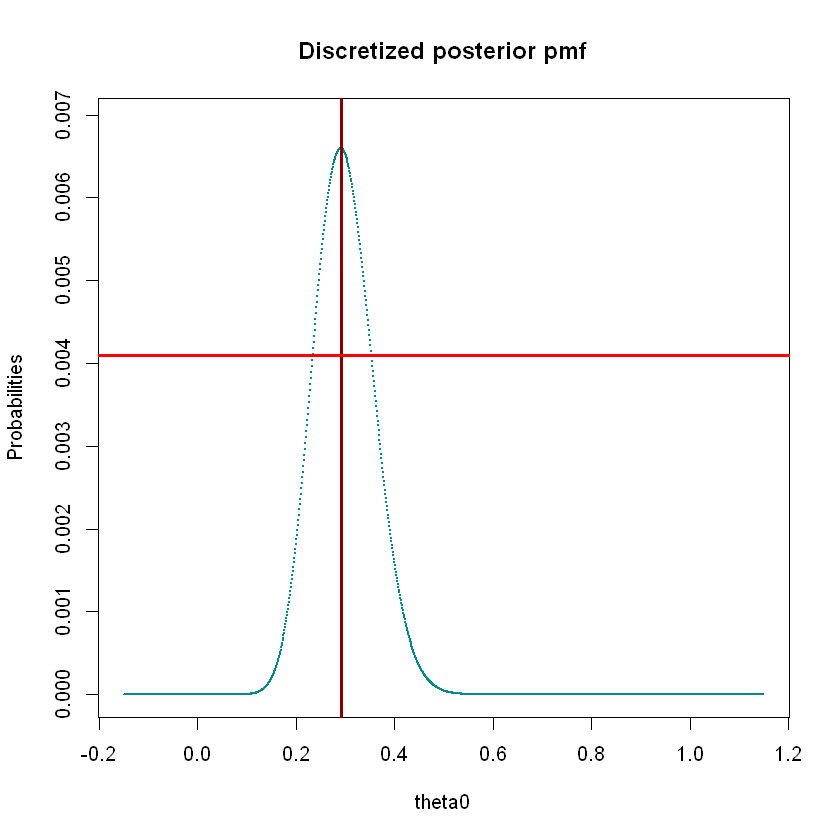

In [30]:
options(repr.plot.width=7,repr.plot.height=7)
d.post0<-c(0,d.post)  # to have same length as theta0 and p.post
y.max<-max(d.post0)
plot(theta0,d.post0,ylim=c(0,y.max*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,main="Discretized posterior pmf")
lines(c(-0.15,0),c(0,0),lwd=2,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=2,col="DarkCyan")
legx<-ifelse(n1/n<0.5,n1/n+0.1,n1/n-0.1)
abline(v=Disc.MAP,col="DarkRed",lwd=3)
text(legx,0.5,"MAP",col="DarkRed",cex=1.8)
d<-0.0025
abline(h=y.max-d,lwd=2.5,col="red")

In [31]:
CI.theta<-function(s){
    idxs<-which(d.post0>=(y.max-s))
    return(theta0[c(min(idxs),max(idxs))])
    }
gamma<-0.90
Disc.gamma.3<-function(s){
    CI.thetas<-CI.theta(s)
    return(diff(Vp.post.fun(CI.thetas))-gamma)
    }

In [32]:
Disc.gamma.3(0.30)

[1] 0.1

In [33]:
G.s<-uniroot(Disc.gamma.3,c(0,y.max))
Disc.s<-G.s$root
round(Disc.s,4)

[1] 0.0048

In [34]:
Credible.Interval.03<-CI.theta(Disc.s)
cat(sprintf("Credible interval 03 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.03[1],4),round(Credible.Interval.03[2],4)))

Credible interval 03 (90.00 %): (0.1990, 0.3960)

In [35]:
width.03<-diff(Credible.Interval.03)
round(width.03,4)

[1] 0.197